In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pyaudi import gdual
from pyaudi import sin, cos, tanh

import nn

## Full trajectory learning

Full trajectories are learned updating the weights so that we minimize the
error of final state of trajectories driven by the NN. We consdier a discrete, fixed time control. The objective is always to reach the (0,0) position

We define the architecture of the network:

    Inputs: 3
    Hidden layers: 2 with 5 units/layer
    Outputs: 1

We will need the first order derivatives

In [2]:
n_units = [2, 5, 5, 2]
order = 1

### $(d_x, d_y)$ control, fixed initial state

state: $(x,y)$

dynamics: $dx = u_1$, $dy = u_2$

In [3]:
def dy(state, u, t):
    state[0] += u[0]*t
    state[1] += u[1]*t
    return state

In [4]:
# Initial state
x = 10
y = 10

state = [x,y]

In [5]:
# NN definition
weights = nn.initialize_weights(n_units, order)                
biases = nn.initialize_biases(n_units, order)     
trajs = []

##### Training

We train the model by running trajectories until the end, which provides us a gdual expression of the final state. 
We do gradient descent to minimize the distance of the final state to the goal state

In [7]:
t = 0.1
for epoch in range(50):
    traj = []
    state = [x,y]
    traj.append((state[0], state[1]))
    for i in range(20):
        N = nn.N_f(state, weights, biases)
        u = [0,0]
        u[0] = N[0]  
        u[1] = N[1]
        state = dy(state, u, t)
        traj.append((state[0].constant_cf, state[1].constant_cf))

    loss = (state[0]**2 + state[1]**2)
    weights, biases = nn.GD_update(loss, weights, biases, 0.01) 
    trajs.append(traj)

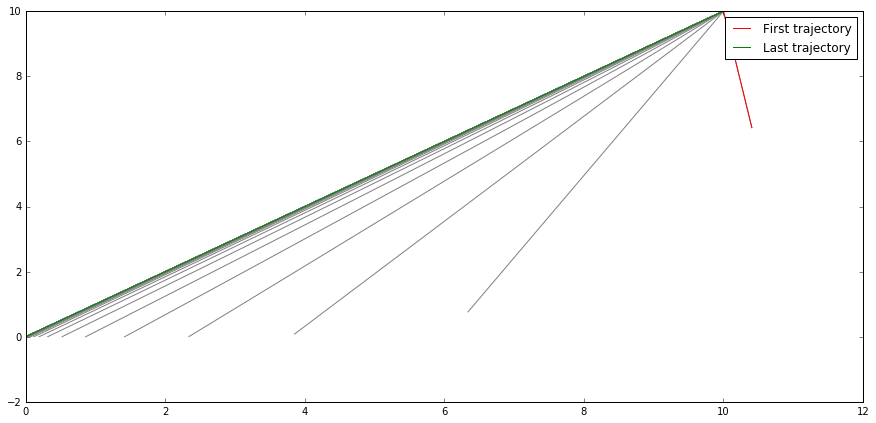

In [8]:
plt.rcParams['figure.figsize'] = (15,7)

    
for t in trajs:
    traj = np.asarray(t)
    plt.plot(traj[:,0], traj[:,1], color='gray')
 
    
traj = np.asarray(trajs[0])
first_traj, = plt.plot(traj[:,0], traj[:,1], color='red', label='First trajectory')
    
traj = np.asarray(trajs[-1])
last_traj, = plt.plot(traj[:,0], traj[:,1], color='green', label='Last trajectory')

plt.legend(handles=[first_traj, last_traj])
    

### $(d_x, d_y)$ control, random initial state

state: $(x,y)$

dynamics: $dx = u_1$, $dy = u_2$

In [8]:
def step(state, u, t):
    state[0] += u[0]*t
    state[1] += u[1]*t
    return state
    

In [9]:
# NN definition
weights = nn.initialize_weights(n_units, order)                
biases = nn.initialize_biases(n_units, order)     
trajs = []

##### Training

In [10]:
t = 0.1
for epoch in range(200):
    traj = []
    x = np.random.rand()*10-5
    y = np.random.rand()*10-5
    state = [x,y]
    for i in range(20):
        N = nn.N_f(state, weights, biases)
        u = [0,0]
        u[0] = N[0]  
        u[1] = N[1]
        state = dy(state, u, t)

    loss = (state[0]**2 + state[1]**2)
    weights, biases = nn.GD_update(loss, weights, biases, 0.01) 
    trajs.append(traj)

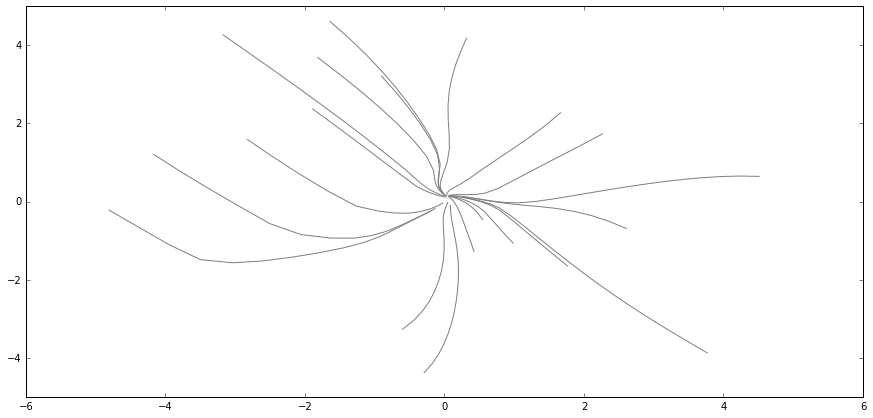

In [11]:
plt.rcParams['figure.figsize'] = (15,7)

t = 0.1
trajs = []
#Generate some trajectories to visualize
for epoch in range(20):
    traj = []
    x = np.random.rand()*10-5
    y = np.random.rand()*10-5
    state = [x,y]
    traj.append((state[0], state[1]))
    for i in range(20):
        N = nn.N_f(state, weights, biases)
        u = [0,0]
        u[0] = N[0]  
        u[1] = N[1]
        state = dy(state, u, t)
        traj.append((state[0].constant_cf, state[1].constant_cf))
    trajs.append(traj)
    
for epoch in range(len(trajs)):
    traj = np.asarray(trajs[int(epoch)])
    plt.plot(traj[:,0], traj[:,1], color='gray')



### $(thrust,\theta)$ control, fixed initial state

state: $(x,y)$

dynamics: $dx = u_1sin(u_2)$, $dy = u_1cos(u_2)$

In [12]:
def dy(state, u, t):
    state[0] += sin(u[0])*u[1]*t
    state[1] += cos(u[0])*u[1]*t
    return state
    

In [13]:
# Initial state
x = 10
y = 10

state = [x,y]

In [14]:
# NN definition
weights = nn.initialize_weights(n_units, order)                
biases = nn.initialize_biases(n_units, order)     
trajs = []

##### Training

In [15]:
t = 0.1
for epoch in range(200):
    traj = []
    state = [x,y]
    traj.append((state[0], state[1]))
    for i in range(20):
        N = nn.N_f(state, weights, biases)
        u = [0,0]
        u[0] = N[0]  
        u[1] = N[1]
        state = dy(state, u, t)
        traj.append((state[0].constant_cf, state[1].constant_cf))

    loss = (state[0]**2 + state[1]**2)
    weights, biases = nn.GD_update(loss, weights, biases, 0.0005) 
    trajs.append(traj)


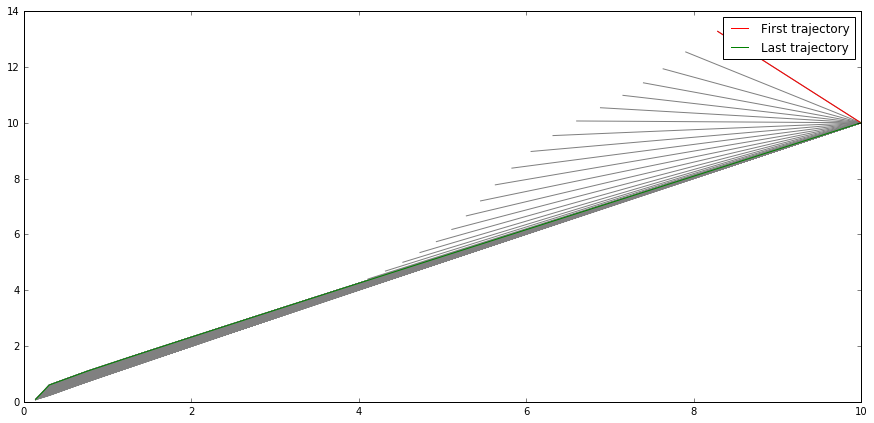

In [16]:
plt.rcParams['figure.figsize'] = (15,7)
    
for t in trajs:
    traj = np.asarray(t)
    plt.plot(traj[:,0], traj[:,1], color='gray')
    
traj = np.asarray(trajs[0])
first_traj, = plt.plot(traj[:,0], traj[:,1], color='red', label='First trajectory')
    
traj = np.asarray(trajs[-1])
last_traj, = plt.plot(traj[:,0], traj[:,1], color='green', label='Last trajectory')

plt.legend(handles=[first_traj, last_traj])
    

### $(thrust, d_\theta)$ control, fixed initial state

state: $(x,y,\theta)$

dynamics: $dx = u_1sin(\theta)$, $dy = u_1cos(\theta)$, $d_\theta = u_2$

In [21]:
def dy(state, u, t):
    state[0] += sin(state[2])*u[1]*t
    state[1] += cos(state[2])*u[1]*t
    state[2] += u[0]
    return state

In [22]:
# Initial state
x = 5
y = 5
theta = 0

state = [x,y,theta]

We use a larger network in this case, 10 units per layer and 3 outputs

In [23]:
n_units = [3, 10, 10, 2]

In [24]:
# NN definition, smaller weights are needed to predict dtheta correctly, otherway it gets stuck
# in a loop most of the time
weights = nn.initialize_weights(n_units, order, 0.01)                
biases = nn.initialize_biases(n_units, order, 0.01)     
trajs = []

##### Training

In [25]:
trajs = []

In [28]:
t = 0.2
for epoch in range(200):
    traj = []
    state = [x,y,theta]
    traj.append((state[0], state[1]))
    for i in range(10):
        N = nn.N_f(state, weights, biases)
        u = [0,0]
        u[0] = N[0]  
        u[1] = N[1]
        state = dy(state, u, t)
        traj.append((state[0].constant_cf, state[1].constant_cf))

    loss = (state[0]**2 + state[1]**2)

    weights, biases = nn.GD_update(loss, weights, biases, 0.001) 
    trajs.append(traj)

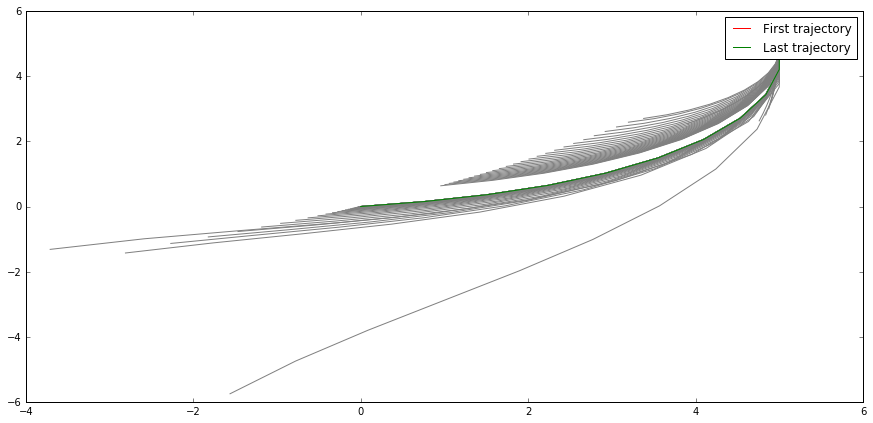

In [38]:
plt.rcParams['figure.figsize'] = (15,7)

for i in range(0,len(trajs),5):
    traj = np.asarray(trajs[i])
    plt.plot(traj[:,0], traj[:,1], color='gray')    

for t in trajs[-10:]:
    traj = np.asarray(t)
    plt.plot(traj[:,0], traj[:,1], color='gray')    
    
traj = np.asarray(trajs[0])
first_traj, = plt.plot(traj[:,0], traj[:,1], color='red', label='First trajectory')
    
traj = np.asarray(trajs[-1])
last_traj, = plt.plot(traj[:,0], traj[:,1], color='green', label='Last trajectory')

plt.legend(handles=[first_traj, last_traj])
